In [139]:
from datetime import date
studentName="Zijie Li"
studentEmail="li.zijie@northeastern.edu"
homework=7
contributedPercentage=100
print("IE 7300: Statistical learning for Engineering")
print("\n"*15)
print(f'Homework -{homework}')
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7300: Statistical learning for Engineering
















Homework -7
Student name :Zijie Li
Student Email :li.zijie@northeastern.edu
















Percentage of Effort Contributed by Student : 100%
Submission Date: 2022-11-01


In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from typing import Dict, Any, List
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [96]:
#Custom decision tree regressor
from statmodels.decisiontrees import decisiontreeregressor
#Custom random forest regressor
from statmodels.random_forest import RandomForestRegressor
#Custom lasso regressor
from statmodels.regression import LassoRegression
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

#Find performance
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.shape

(19735, 29)

Since the dataset is too large we need to do some data aggration to avoid long time execution.
The data will take every 60 mins average.

In [5]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [6]:
new = df.groupby(np.arange(len(df))//6).mean()
new.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044
1,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206
2,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932
3,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642
4,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274


In [7]:
new = new.drop(['rv2'],axis=1)
new.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
0,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044
1,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206
2,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932
3,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642
4,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274


In [68]:
X = new
y = new['rv1']
X = X.drop(['rv1'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

a) Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy. 

### Lasso

In [104]:
sc = StandardScaler()
X_tranformed = pd.DataFrame(sc.fit_transform(X_train))

lassoModel = LassoRegression()
lassoModel.fit(X_tranformed.values, y_train) 
print("Lasso model cofficients :",lassoModel.coef_)
y_hat = lassoModel.predict(X_test.to_numpy())

print('Lasso Regression - Root Mean Squared error:', round(mean_squared_error(y_test,y_hat,squared=False),4))
print('Lasso Regression - R-Squared:', round(r2_score(y_test,y_hat),4))

Lasso model cofficients : [ 2.50099745e+01 -6.55780548e-04  5.93560050e-03 -3.27180395e-03
 -1.12518485e-02 -7.67739812e-03  2.77264615e-03  3.01000257e-04
  1.18303011e-03  7.85264472e-03 -5.63223433e-03  6.93090450e-03
  5.85402161e-04 -8.36184178e-03 -4.26603615e-06 -9.16941897e-03
 -6.95095268e-03 -4.37734731e-03 -6.18248745e-03  3.70548984e-04
 -8.97813061e-03 -1.21629558e-02  8.04477101e-03  6.85409479e-03
  5.76228339e-05  7.83942744e-04  2.80093700e-03]
Lasso Regression - Root Mean Squared error: 7.6862
Lasso Regression - R-Squared: -0.747


In [101]:
df['rv1'].mean()

24.988033485049435

For Lasso regression, the model outcome with a RMSE 7.6862 is a bad perfomance result.\
For the mean of target is around 25, RMSE is too large, and the R-squared is -2.2769 which indicates that model follow the data's trend very bad.\
Overall, the Lasso performance is bad and maynot be suitable for this dataset.

### Decision Tree

In [90]:
dtmodel = decisiontreeregressor(min_samples_split=3, max_depth=3)
dtmodel.fit(X_train,y_train.reshape(-1,1))
y_pred = dtmodel.predict(X_test.to_numpy())

In [103]:
print('Decision Tree - Root Mean Squared error:', round(mean_squared_error(y_test,y_pred,squared=False),4))
print('Decision Tree - R-Squared:', round(r2_score(y_test,y_pred),4))

Decision Tree - Root Mean Squared error: 5.9486
Decision Tree - R-Squared: -0.0465


For decision tree model, RMSE is around 6 which is also a poor number but slightly better than Lasso Model.\
The R2 score is -0.0465 which also bad, the model cannot get the features trend and follow the trends.\
Overall, the decision tree model has better performance than Lasso model but the accuracy is not acceptable either.

### Random Forest

In [97]:
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train.to_numpy(),y_train)

In [105]:
y_pred_rf = rfmodel.predict(X_test.to_numpy())
print('Random Forest - Root Mean Squared error:', round(mean_squared_error(y_test,y_pred_rf,squared=False),4))
print('Random Forest - R-Squared:', round(r2_score(y_test,y_pred_rf),4))

Random Forest - Root Mean Squared error: 6.1096
Random Forest - R-Squared: -0.1038


For the Random Forest model, the RMSE score is around 6.1 which is similar to the decision tree model.\
The R2 score is -0.1 which is slightly worse than the decision tree's R2. This means Random Forest model is also not follow the data trend well.\
This might because Random Forest model also use the same decision tree model as a weaklearner.\
Overall, the accuracy of prediction is still not acceptable.

### Gradient Boost

In [99]:
%%time
gradBoostModel = GradientBoostTreeRegressor(n_elements=500, learning_rate=0.01)
    
#fit the model
gradBoostModel.fit(X_train.values,y_train)

y_pred_gb = gradBoostModel.predict(X_test.values)


CPU times: total: 24min 27s
Wall time: 24min 30s


In [106]:
print('Gradient Boost - Root Mean Squared error:', round(mean_squared_error(y_test,y_pred_gb,squared=False),4))
print('Gradiemt Boost - R-Squared:', round(r2_score(y_test,y_pred_gb),4))

Gradient Boost - Root Mean Squared error: 5.9084
Gradiemt Boost - R-Squared: -0.0323


Within all 4 models, Gradient Boost has the best performance with a RMSE 5.9.\
For the R-squared -0.03, the model follow the trend of data is still worse than a horizental line.\
The accuracy is still poor.

b) Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model. 

### Lasso

In [112]:
from sklearn.metrics import mean_absolute_error

print('Lasso Regression - Mean Absolute Error:',round(mean_absolute_error(y_test,y_hat),4))
print('Lasso Regression - Root Mean Squared error:', round(mean_squared_error(y_test,y_hat,squared=False),4))
print('Lasso Regression - R-Squared:', round(r2_score(y_test,y_hat),4))

Lasso Regression - Mean Absolute Error: 6.2838
Lasso Regression - Root Mean Squared error: 7.6862
Lasso Regression - R-Squared: -0.747


Low MAE values indicate that the model is correctly predicting. Larger MAE values indicate that the model is poor at prediction.\
Use the R2 score to get the accuracy of your model on a percentage scale, that is 0–100, just like in a classification model.\
Another commonly used metric is the root mean squared error, which is the square root of the average squared distance (difference between actual and predicted value).\
Use the RMSE to determine whether there are any large errors or distances that could be caused if the model overestimated the prediction (that is the model predicted values that were significantly higher than the actual value) or underestimated the predictions (that is, predicted values less than actual prediction).\
In the Lasso model, we could see all the metrics indicate bab performance, and the fit of the data is really bad.\
The data aggregation might be a problem and there is no feature selection phase before the fitting.
 

### Desicion Tree

In [113]:
print('Decision Tree - Mean Absolute Error:',round(mean_absolute_error(y_test,y_pred),4))
print('Decision Tree - Root Mean Squared error:', round(mean_squared_error(y_test,y_pred,squared=False),4))
print('Decision Tree - R-Squared:', round(r2_score(y_test,y_pred),4))

Decision Tree - Mean Absolute Error: 4.7834
Decision Tree - Root Mean Squared error: 5.9486
Decision Tree - R-Squared: -0.0465


The Decision Tree model also under the expectation.\
The metrics indicate the modedl is slightly better than the Lasso model.\
The possible reason is because the data quality is not good and the feature in training is not suitable for the Model.

### Random Forest

In [114]:
print('Random Forest - Mean Absolute Error:',round(mean_absolute_error(y_test,y_pred_rf),4))
print('Random Forest - Root Mean Squared error:', round(mean_squared_error(y_test,y_pred_rf,squared=False),4))
print('Random Forest - R-Squared:', round(r2_score(y_test,y_pred_rf),4))

Random Forest - Mean Absolute Error: 4.8627
Random Forest - Root Mean Squared error: 6.1096
Random Forest - R-Squared: -0.1038


The Random Forest model has a similar performance to the decision tree model.\
The possible reason is the Random Forest also use the decision tree model as a base model of the random forest.\
To improve the performance we need to make the decision tree model fit data better.

### Gradient Boost

In [115]:
print('Gradient Boost - Mean Absolute Error:',round(mean_absolute_error(y_test,y_pred_gb),4))
print('Gradient Boost - Root Mean Squared error:', round(mean_squared_error(y_test,y_pred_gb,squared=False),4))
print('Gradiemt Boost - R-Squared:', round(r2_score(y_test,y_pred_gb),4))

Gradient Boost - Mean Absolute Error: 4.7415
Gradient Boost - Root Mean Squared error: 5.9084
Gradiemt Boost - R-Squared: -0.0323


For Gradient Boost model, this also use the decision tree model as a base learner. However, the gradient boost model perform better than the Random Forest model.\
The potential reason is the gradient boost model perform the decision tree much more times than the random forest model.\
To improve the performance, the most basic reason is feature selections and tuning the decision tree.

c) Do you see any bias and variance issues? How do you interpret each model output? 

__Underfitting occurs when the model is unable to match the input data to the target data. This happens when the model is not complex enough to match all the available data and performs poorly with the training dataset.__

__Overfitting relates to instances where the model tries to match non-existent data. This occurs when dealing with highly complex models where the model will match almost all the given data points and perform well in training datasets. However, the model would not be able to generalize the data point in the test data set to predict the outcome accurately.__

### Lasso

In [119]:
lt = lassoModel.predict(X_train.to_numpy())
print('Lasso Train- Root Mean Squared error:', round(mean_squared_error(y_train,lt,squared=False),4))
print('Lasso Train- R-Squared:', round(r2_score(y_train,lt),4))
print('Lasso - Root Mean Squared error:', round(mean_squared_error(y_test,y_hat,squared=False),4))
print('Lasso - R-Squared:', round(r2_score(y_test,y_hat),4))

Lasso Train- Root Mean Squared error: 7.7192
Lasso Train- R-Squared: -0.6699
Lasso - Root Mean Squared error: 7.6862
Lasso - R-Squared: -0.747


We could see the metrics for train and test set is both poor and have similar values.\
This indicate this model has high bias issue.\
To improve we need to increase the complexity of the model to count for bias and variance, thus decreasing the overall bias while increasing the variance to an acceptable level. 

### Desicion Tree

In [120]:
dt = dtmodel.predict(X_train.to_numpy())
print('Decision Tree Train- Root Mean Squared error:', round(mean_squared_error(y_train,dt,squared=False),4))
print('Decision Tree Train- R-Squared:', round(r2_score(y_train,dt),4))
print('Decision Tree - Root Mean Squared error:', round(mean_squared_error(y_test,y_pred,squared=False),4))
print('Decision Tree - R-Squared:', round(r2_score(y_test,y_pred),4))

Decision Tree Train- Root Mean Squared error: 5.8261
Decision Tree Train- R-Squared: 0.0487
Decision Tree - Root Mean Squared error: 5.9486
Decision Tree - R-Squared: -0.0465


Train dataset R2 score is siginificant larger than test dataset.\
This may be as sign for high variance issue.\
Increasing the training data set can help to balance bias-variance trade-off. This is the preferred method when dealing with overfitting models.\
Furthermore, this allows users to increase the complexity without variance errors that pollute the model as with a large data set.

### Random Forest

In [122]:
rf = rfmodel.predict(X_train.to_numpy())
print('Random Forest Train- Root Mean Squared error:', round(mean_squared_error(y_train,rf,squared=False),4))
print('Random Forest Train- R-Squared:', round(r2_score(y_train,rf),4))
print('Random Forest - Root Mean Squared error:', round(mean_squared_error(y_test,y_pred_rf,squared=False),4))
print('Random Forest - R-Squared:', round(r2_score(y_test,y_pred_rf),4))

Random Forest Train- Root Mean Squared error: 2.31
Random Forest Train- R-Squared: 0.8505
Random Forest - Root Mean Squared error: 6.1096
Random Forest - R-Squared: -0.1038


Both RMSE and R2 score for the training dataset is way better than testing dataset.\
This means there is high variance problem.\
variance creates variance errors that lead to incorrect predictions seeing trends or data points that do not exist.\
However, the metrics also show the performance is not good for training dataset, this may because the preprocessiong of data is not good.

### Grradient Boost

In [123]:
gb = gradBoostModel.predict(X_train.values)
print('Gradient Boost Train - Root Mean Squared error:', round(mean_squared_error(y_train,gb,squared=False),4))
print('Gradiemt Boost Train - R-Squared:', round(r2_score(y_train,gb),4))
print('Gradient Boost - Root Mean Squared error:', round(mean_squared_error(y_test,y_pred_gb,squared=False),4))
print('Gradiemt Boost - R-Squared:', round(r2_score(y_test,y_pred_gb),4))

Gradient Boost Train - Root Mean Squared error: 5.4371
Gradiemt Boost Train - R-Squared: 0.1715
Gradient Boost - Root Mean Squared error: 5.9084
Gradiemt Boost - R-Squared: -0.0323


The performance between train and test dataset has no large difference.\
There is slightly variance issue. The model performance is still bad, the reason should also be the original dataset is not well preprocessed.

d) Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence.

In [131]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)
    y_pred = model.predict(X_permuted.values)

    permuted_score = r2_score(y, y_pred)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """
    y_pred = model.predict(X.values)

    baseline_score_train = r2_score(y, y_pred)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance
    
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

###  Feature importance for Lasso regression

In [124]:
lassoImportantfeatures = pd.DataFrame(data={'feature': X.columns})
lassoImportantfeatures["importance"] = pd.DataFrame(lassoModel.coef_[1:])
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='importance', ascending=False)

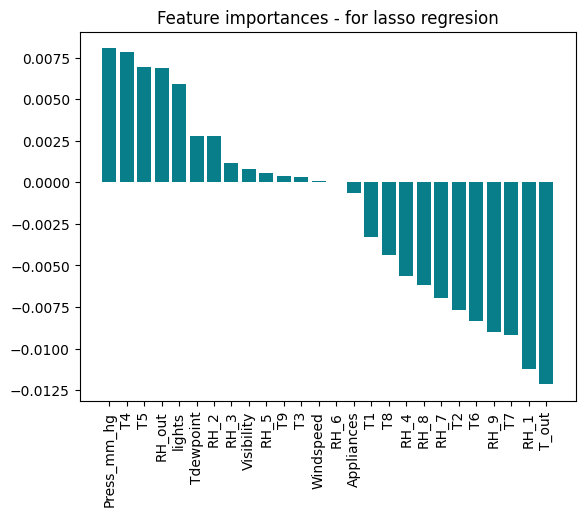

In [125]:
plt.bar(x=lassoImportantfeatures['feature'], height=lassoImportantfeatures['importance'], color='#087E8B')
plt.title('Feature importances - for lasso regresion')
plt.xticks(rotation='vertical')
plt.show()

The feature which has longer distance to the 0 indicate more important to the model.\
With coefficient, we could say 'Press_mm_hg','T4",'T5','RH_out','RH_4'till the end of the plot are the important features to this model. 

### Decision Tree Feature Importance

In [127]:
dtmodel.print_tree()

|- RH_out <= 83.58333333333333 :Variance Red 0.1502
 left-->|- Visibility <= 23.333333333333332 :Variance Red 0.3122
  left-->|- RH_7 <= 28.238888888888898 :Variance Red 2.7869
    left-->|- RH_3 <= 35.462696428571434 :Variance Red 16.6816
        left-->24.2615
        right-->32.5739
    right-->|- lights <= 0.0 :Variance Red 3.6904
        left-->27.3491
        right-->23.4848
  right-->|- RH_9 <= 35.57444444444445 :Variance Red 0.266
    left-->|- T9 <= 22.947095238095248 :Variance Red 3.9325
        left-->25.5341
        right-->31.8163
    right-->|- T6 <= 4.663055555555556 :Variance Red 0.2179
        left-->25.4719
        right-->24.1378
 right-->|- T4 <= 17.902222222222235 :Variance Red 0.4918
  left-->|- T3 <= 20.828888888888883 :Variance Red 2.3438
    left-->|- RH_6 <= 89.4136111111111 :Variance Red 1.5776
        left-->20.2531
        right-->23.6654
    right-->7.7271
  right-->|- RH_5 <= 42.1715238095238 :Variance Red 0.259
    left-->|- RH_4 <= 34.01 :Variance Red 5

In [128]:
dtFeatures = pd.DataFrame(dtmodel.get_features())
dtFeatures.columns = ['featurename','treelevel']
dtFeatures = dtFeatures.drop_duplicates()
dtFeatures.sort_values('treelevel')

,featurename,treelevel
13,RH_out,0
6,Visibility,1
12,T4,1
2,RH_7,2
5,RH_9,2
8,T3,2
11,RH_5,2
0,RH_3,3
1,lights,3
3,T9,3


Feature importance (FI) = Feature metric * number of instances – its left child node metric * number of instances for the left child – its right child node metric * number of instances for the right child\


### Random Forest Feature Importance

In [134]:
perm_importance_result_train = permutation_importance(
    rfmodel, X_train, y_train, n_repeats=10)

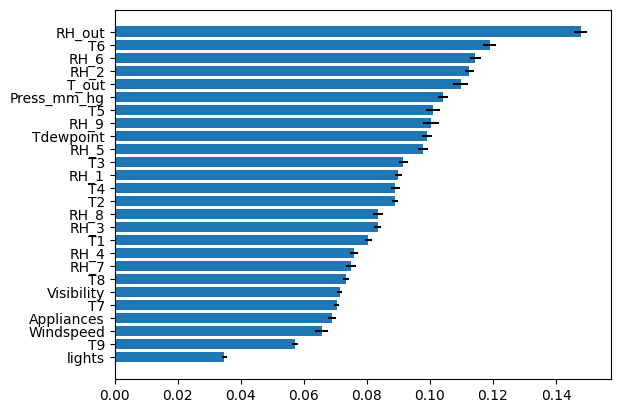

In [135]:
plot_feature_importances(perm_importance_result_train, X_train.columns)

From the plot we could know that the 'RH_out' is most important and the 'light' is least important.\
The larger the value, the more important the feature.

### Gradient Boost Feature Importance

In [136]:
perm_importance_result_train = permutation_importance(
   gradBoostModel, X_train, y_train, n_repeats=10)

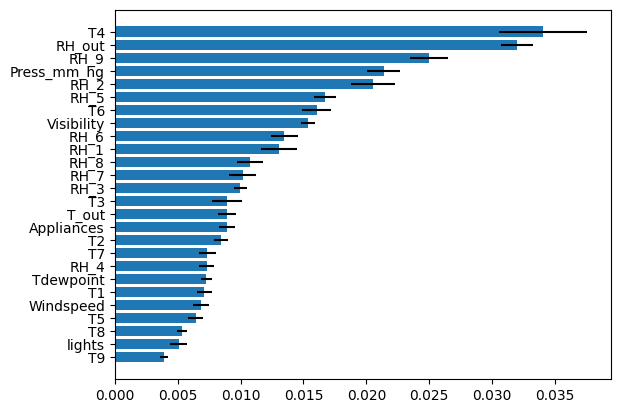

In [137]:
plot_feature_importances(perm_importance_result_train, X_train.columns)

From the plot we could know that the 'T4' is most important and the 'T9' is least important.\
The larger the value, the more important the feature.